<a href="https://colab.research.google.com/github/techrhea777/Data-Science-Projects/blob/main/Precipitation_Prognosticator_Forecasting_Australia's_Future_Rains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

I will use _decision trees_ and _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
>
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, I am tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.
>
>
> ![](https://i.imgur.com/KWfcpcO.png)




```
# This is formatted as code
```

Let's install and import some required libraries before we begin.

In [1]:
!pip install pandas numpy matplotlib

In [2]:
!pip install pandas numpy matplotlib seaborn --quiet

In [3]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import seaborn as sns

import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter.

In [5]:
#od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package', force = True)

The dataset is downloaded and extracted to the folder

1.   List item
2.   List item

`weather-dataset-rattle-package`.

In [8]:
#os.listdir('weather-dataset-rattle-package')

The file `weatherAUS.csv` contains the data. Let's load it into a Pandas dataframe.

In [10]:
raw_df = pd.read_csv('weatherAUS.csv')

In [11]:
raw_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01        Albury     13.4     22.9       0.6          NaN   
1       2008-12-02        Albury      7.4     25.1       0.0          NaN   
2       2008-12-03        Albury     12.9     25.7       0.0          NaN   
3       2008-12-04        Albury      9.2     28.0       0.0          NaN   
4       2008-12-05        Albury     17.5     32.3       1.0          NaN   
...            ...           ...      ...      ...       ...          ...   
118831  2012-05-17  PerthAirport      6.8     21.4       0.0          2.0   
118832  2012-05-18  PerthAirport      8.6     23.6       0.0          2.0   
118833  2012-05-19  PerthAirport      8.0     24.9       0.0          2.2   
118834  2012-05-20  PerthAirport     10.2     26.6       0.0          3.2   
118835  2012-05-21  PerthAirport      8.4     25.8       0.0          3.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
118831       5.1         ENE           22.0         NE        WSW   
118832       9.4         ENE           28.0         NE        ESE   
118833       9.4         ENE           37.0         NE          E   
118834       9.3           S           33.0        ENE        SSE   
118835       9.3           S           37.0         NW        SSW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
118831           9.0           9.0         82.0         45.0       1020.4   
118832          13.0           9.0         65.0         37.0       1023.9   
118833          22.0          11.0         62.0         29.0       1025.6   
118834          17.0          13.0         51.0         28.0       1023.4   
118835           4.0          13.0         53.0         28.0       1024.8   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
118831       1017.8       6.0       7.0     13.8     20.6        No   
118832       1022.3       1.0       3.0     16.3     22.0        No   
118833       1021.8       0.0       1.0     15.1     24.2        No   
118834       1020.4       2.0       4.0     16.3     26.3        No   
118835        102.0       NaN       NaN      NaN      NaN       NaN   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
118831           No  
118832           No  
118833           No  
118834           No  
118835          NaN  

[118836 rows x 23 columns]

Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118836 entries, 0 to 118835
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           118836 non-null  object 
 1   Location       118836 non-null  object 
 2   MinTemp        117519 non-null  float64
 3   MaxTemp        117712 non-null  float64
 4   Rainfall       115907 non-null  float64
 5   Evaporation    66901 non-null   float64
 6   Sunshine       61748 non-null   float64
 7   WindGustDir    108974 non-null  object 
 8   WindGustSpeed  109000 non-null  float64
 9   WindDir9am     109681 non-null  object 
 10  WindDir3pm     114909 non-null  object 
 11  WindSpeed9am   117218 non-null  float64
 12  WindSpeed3pm   115927 non-null  float64
 13  Humidity9am    116406 non-null  float64
 14  Humidity3pm    115303 non-null  float64
 15  Pressure9am    107969 non-null  float64
 16  Pressure3pm    108004 non-null  float64
 17  Cloud9am       74041 non-null

In [13]:
raw_df.dropna(subset=['RainTomorrow','RainToday'], inplace=True)   # start removing all targets that has emty values so that it should not cause problem while predicting the target.

In [14]:
# exploratory and visualisation similar to one used in LogisticRegression

In [15]:
px.histogram(raw_df,
             x='Location',
             color='RainToday',
             title='Location vs. Rainy Days')

In [16]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [17]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [18]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [19]:
px.strip(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

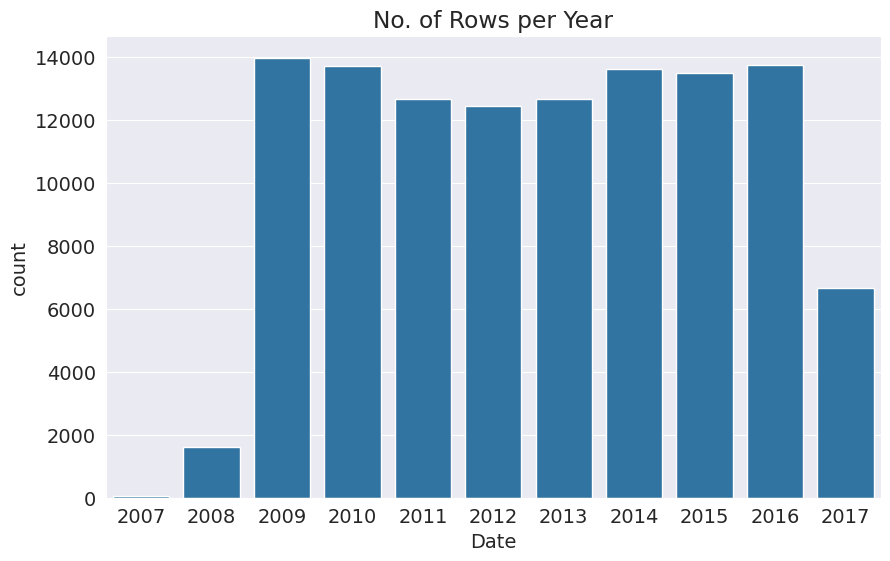

In [20]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.  

In [21]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [22]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (80746, 23)
val_df.shape : (13478, 23)
test_df.shape : (20389, 23)


> **EXERCISE**: Scrape climate data for recent years (2017 to 2021) from http://www.bom.gov.au/climate/data and try training a model with the enlarged dataset.

In [23]:
# In making the dataset we also deal with how we scrape with dataset for recent years from (2017 to 2021) and compare wrt to climate/data we will be having the real time split of datasets wrt to these years in comparison with our dataset or we import the dataset and train the model

### Input and Target Columns

Let's identify the input and target columns.

In [24]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [25]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [26]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [27]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's also identify the numeric and categorical columns.

> Indented block



In [28]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [29]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [30]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


> **EXERCISE**: Study how various columns are correlated with the target and select just a subset of the columns, instead of all of the. Observe how it affects the results.

In [31]:
#use cofficient of correlation inorder to reate
raw_df.WindSpeed9am.corr(raw_df.WindSpeed3pm)

0.5397009462068133

In [32]:
raw_df.Pressure3pm.corr(raw_df.Pressure9am)

0.96134988136085

In [ ]:
train_inputs.corr()

<ipython-input-90-dfb3895cff00>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.729520  0.108449     0.486127  0.063048   
MaxTemp        0.729520  1.000000 -0.071548     0.613494  0.465855   
Rainfall       0.108449 -0.071548  1.000000    -0.077471 -0.228770   
Evaporation    0.486127  0.613494 -0.077471     1.000000  0.372397   
Sunshine       0.063048  0.465855 -0.228770     0.372397  1.000000   
WindGustSpeed  0.180967  0.068216  0.129821     0.215701 -0.031064   
WindSpeed9am   0.180688  0.013613  0.085074     0.202127  0.008170   
WindSpeed3pm   0.178785  0.051405  0.052839     0.136083  0.054840   
Humidity9am   -0.228749 -0.503369  0.225409    -0.530279 -0.494491   
Humidity3pm    0.020477 -0.501434  0.254277    -0.407711 -0.632445   
Pressure9am   -0.441778 -0.319241 -0.167802    -0.275882  0.047027   
Pressure3pm   -0.450147 -0.414289 -0.124990    -0.299957 -0.012714   
Cloud9am       0.101871 -0.284557  0.204344    -0.197686 -0.680324   
Cloud3pm       0.044385 -0.269242  0.178695    -0.193939 -0.703936   
Temp9am        0.898997  0.884262  0.015690     0.567657  0.283938   
Temp3pm        0.702322  0.983988 -0.074416     0.594498  0.486504   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.180967      0.180688      0.178785    -0.228749   
MaxTemp             0.068216      0.013613      0.051405    -0.503369   
Rainfall            0.129821      0.085074      0.052839     0.225409   
Evaporation         0.215701      0.202127      0.136083    -0.530279   
Sunshine           -0.031064      0.008170      0.054840    -0.494491   
WindGustSpeed       1.000000      0.609994      0.689324    -0.226398   
WindSpeed9am        0.609994      1.000000      0.524283    -0.279413   
WindSpeed3pm        0.689324      0.524283      1.000000    -0.158292   
Humidity9am        -0.226398     -0.279413     -0.158292     1.000000   
Humidity3pm        -0.029377     -0.032289      0.009761     0.663469   
Pressure9am        -0.463746     -0.235011     -0.299223     0.134616   
Pressure3pm        -0.419265     -0.181446     -0.259878     0.182348   
Cloud9am            0.076702      0.030194      0.054486     0.453144   
Cloud3pm            0.118738      0.060453      0.028125     0.359462   
Temp9am             0.154533      0.133504      0.167270    -0.472435   
Temp3pm             0.031335      0.000405      0.024873    -0.493761   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.020477    -0.441778    -0.450147  0.101871  0.044385   
MaxTemp          -0.501434    -0.319241    -0.414289 -0.284557 -0.269242   
Rainfall          0.254277    -0.167802    -0.124990  0.204344  0.178695   
Evaporation      -0.407711    -0.275882    -0.299957 -0.197686 -0.193939   
Sunshine         -0.632445     0.047027    -0.012714 -0.680324 -0.703936   
WindGustSpeed    -0.029377    -0.463746    -0.419265  0.076702  0.118738   
WindSpeed9am     -0.032289    -0.235011    -0.181446  0.030194  0.060453   
WindSpeed3pm      0.009761    -0.299223    -0.259878  0.054486  0.028125   
Humidity9am       0.663469     0.134616     0.182348  0.453144  0.359462   
Humidity3pm       1.000000    -0.035428     0.045522  0.526730  0.526842   
Pressure9am      -0.035428     1.000000     0.960806 -0.144662 -0.165216   
Pressure3pm       0.045522     0.960806     1.000000 -0.074671 -0.100334   
Cloud9am          0.526730    -0.144662    -0.074671  1.000000  0.615270   
Cloud3pm          0.526842    -0.165216    -0.100334  0.615270  1.000000   
Temp9am          -0.210596    -0.412183    -0.458240 -0.122314 -0.112193   
Temp3pm          -0.551977    -0.275289    -0.379609 -0.301452 -0.309597   

                Temp9am   Temp3pm  
MinTemp        0.898997  0.702322  
MaxTemp        0.884262  0.983988  
Rainfall       0.015690 -0.074416  
Evaporation    0.567657  0.594498  
Sunshine       0.283938  0.486504  
WindGustSpeed  0.154533  0.031335  
WindSpeed9am   0.133504  0.000405  
Wi

### Imputing missing numeric values

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [35]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [36]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling Numeric Features

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [39]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [40]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0            0.0   
max  0.952830  0.948960  0.666307     0.485517       1.0            1.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.233058   
max      0.669231      0.850575         1.00          1.0     0.970248   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min     0.226351  0.000000  0.000000  0.021097  0.026871  
max     0.984797  0.888889  0.888889  0.943038  0.925144

> **EXERCISE**: Try a different [scaling strategy](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) and observe how it affects the results.

In [41]:
from sklearn.preprocessing import MaxAbsScaler
?MaxAbsScaler
scaler = MaxAbsScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
train_inputs[numeric_cols].describe().loc[['min','max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min      0.0  0.013233       0.0          0.0       0.0            0.0   
max      1.0  1.000000       1.0          1.0       1.0            1.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0           0.0          0.0          0.0          0.0   
max           1.0           1.0          1.0          1.0          1.0   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min          0.0       0.0       0.0  0.027426  0.005825  
max          1.0       1.0       1.0  1.000000  1.000000

### Encoding Categorical Data

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
raw_df[categorical_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0             Albury           W          W        WNW        No
1             Albury         WNW        NNW        WSW        No
2             Albury         WSW          W        WSW        No
3             Albury          NE         SE          E        No
4             Albury           W        ENE         NW        No
...              ...         ...        ...        ...       ...
118830  PerthAirport           S        ENE        SSW        No
118831  PerthAirport         ENE         NE        WSW        No
118832  PerthAirport         ENE         NE        ESE        No
118833  PerthAirport         ENE         NE          E        No
118834  PerthAirport           S        ENE        SSE        No

[114613 rows x 5 columns]

In [44]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [45]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [46]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [47]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [48]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498        Albury  0.681604  0.801512  0.000000     0.036687  0.514869   
2499        Albury  0.693396  0.725898  0.001078     0.036687  0.514869   
2500        Albury  0.634434  0.527410  0.005930     0.036687  0.514869   
2501        Albury  0.608491  0.538752  0.042049     0.036687  0.514869   
2502        Albury  0.566038  0.523629  0.018329     0.036687  0.514869   
...            ...       ...       ...       ...          ...       ...   
117622  PearceRAAF  0.316038  0.534972  0.000000     0.036687  0.627586   
117625  PearceRAAF  0.507075  0.446125  0.077628     0.036687  0.000000   
117626  PearceRAAF  0.507075  0.455577  0.003774     0.036687  0.448276   
117627  PearceRAAF  0.474057  0.434783  0.000000     0.036687  0.641379   
117628  PearceRAAF  0.327830  0.404537  0.000000     0.036687  0.544828   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.367188        NaN        ESE      0.000000   
2499           SSE       0.335938        SSE         SE      0.069231   
2500           ENE       0.320312        ESE        ENE      0.084615   
2501           SSE       0.250000         SE        SSE      0.069231   
2502           ENE       0.187500         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
117622          SW       0.148438        NaN        WSW      0.000000   
117625         NNE       0.367188         NW        WSW      0.184615   
117626         ESE       0.335938          E        ESE      0.153846   
117627           E       0.320312         SE         SE      0.115385   
117628           E       0.218750        ESE        ESE      0.053846   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802     0.510135   
2499        0.195402         0.54         0.30     0.505785     0.496622   
2500        0.448276         0.62         0.67     0.553719     0.604730   
2501        0.195402         0.74         0.65     0.618182     0.633446   
2502        0.103448         0.92         0.63     0.591736     0.589527   
...              ...          ...          ...          ...          ...   
117622      0.149425         0.78         0.38     0.704132     0.695946   
117625      0.321839         0.88         0.74     0.444628     0.513514   
117626      0.298851         0.78         0.69     0.626446     0.675676   
117627      0.229885         0.69         0.55     0.745455     0.746622   
117628      0.172414         0.82         0.49     0.791736     0.790541   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
117622  0.507632  0.513023  0.428270  0.535509        No                0.0   
117625  0.888889  0.888889  0.500000  0.447217       Yes                0.0   
117626  0.888889  0.888889  0.487342  0.449136       Yes                0.0   
117627  0.507632  0.222222  0.440928  0.418426        No                0.0   
117628  0.507632  0.333333  0.381857  0.399232        No                0.0   

        Location_Albany  Location_Albury  Location_BadgerysCreek  \
2498                0.0              1.0                     0.0   
2499                0.0              1.0                     0.0   
2500                0.0              1.0                     0.0   
2501                0.0              1.0                     0.0   
2502                0.0       

> **EXERCISE**: Try a different [encoding strategy](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) and observe how it affects the results.

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [49]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [50]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.036687  0.514869       0.367188   
2499    0.693396  0.725898  0.001078     0.036687  0.514869       0.335938   
2500    0.634434  0.527410  0.005930     0.036687  0.514869       0.320312   
2501    0.608491  0.538752  0.042049     0.036687  0.514869       0.250000   
2502    0.566038  0.523629  0.018329     0.036687  0.514869       0.187500   
...          ...       ...       ...          ...       ...            ...   
117622  0.316038  0.534972  0.000000     0.036687  0.627586       0.148438   
117625  0.507075  0.446125  0.077628     0.036687  0.000000       0.367188   
117626  0.507075  0.455577  0.003774     0.036687  0.448276       0.335938   
117627  0.474057  0.434783  0.000000     0.036687  0.641379       0.320312   
117628  0.327830  0.404537  0.000000     0.036687  0.544828       0.218750   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
117622      0.000000      0.149425         0.78         0.38     0.704132   
117625      0.184615      0.321839         0.88         0.74     0.444628   
117626      0.153846      0.298851         0.78         0.69     0.626446   
117627      0.115385      0.229885         0.69         0.55     0.745455   
117628      0.053846      0.172414         0.82         0.49     0.791736   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498       0.510135  0.777778  0.333333  0.702532  0.808061   
2499       0.496622  0.888889  0.888889  0.675105  0.712092   
2500       0.604730  0.888889  0.888889  0.611814  0.477927   
2501       0.633446  0.888889  0.888889  0.556962  0.518234   
2502       0.589527  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
117622     0.695946  0.507632  0.513023  0.428270  0.535509   
117625     0.513514  0.888889  0.888889  0.500000  0.447217   
117626     0.675676  0.888889  0.888889  0.487342  0.449136   
117627     0.746622  0.507632  0.222222  0.440928  0.418426   
117628     0.790541  0.507632  0.333333  0.381857  0.399232   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
117622                0.0              0.0              0.0   
117625                0.0              0.0              0.0   
117626                0.0              0.0              0.0   
117627                0.0              0.0              0.0   
117628                0.0              0.0              0.0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2498                       0.0                0.0               0.0   
2499                       0.0                0.0               0.0   
2500                       0.0                0.0               0.0   
2501                       0.0                0.0               0.0   
2502                       0.0                0.0               0.0   
...                        ...                ...               ...   
117622                     0.0                0.0               0.0   
117625                     0.0                0.0               0

In [51]:
X_train

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.064558  0.522070       0.289062   
1       0.375000  0.565217  0.000000     0.064558  0.522070       0.289062   
2       0.504717  0.576560  0.000000     0.064558  0.522070       0.304688   
3       0.417453  0.620038  0.000000     0.064558  0.522070       0.132812   
4       0.613208  0.701323  0.002695     0.064558  0.522070       0.265625   
...          ...       ...       ...          ...       ...            ...   
118830  0.389151  0.508507  0.000000     0.019417  0.664336       0.148438   
118831  0.360849  0.495274  0.000000     0.024272  0.356643       0.117188   
118832  0.403302  0.536862  0.000000     0.024272  0.657343       0.164062   
118833  0.389151  0.561437  0.000000     0.026699  0.657343       0.234375   
118834  0.441038  0.593573  0.000000     0.038835  0.650350       0.203125   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.229885      0.275862         0.71         0.22     0.449587   
1           0.045977      0.252874         0.44         0.25     0.497521   
2           0.218391      0.298851         0.38         0.30     0.447934   
3           0.126437      0.103448         0.45         0.16     0.613223   
4           0.080460      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
118830      0.195402      0.149425         0.75         0.44     0.667769   
118831      0.103448      0.103448         0.82         0.45     0.659504   
118832      0.149425      0.103448         0.65         0.37     0.717355   
118833      0.252874      0.126437         0.62         0.29     0.745455   
118834      0.195402      0.149425         0.51         0.28     0.709091   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0          0.474662  0.888889  0.513023  0.508439  0.528155   
1          0.486486  0.507632  0.513023  0.514768  0.576699   
2          0.501689  0.507632  0.222222  0.594937  0.555340   
3          0.570946  0.507632  0.513023  0.533755  0.619417   
4          0.456081  0.777778  0.888889  0.527426  0.681553   
...             ...       ...       ...       ...       ...   
118830     0.658784  0.111111  0.111111  0.472574  0.520388   
118831     0.655405  0.666667  0.777778  0.443038  0.504854   
118832     0.731419  0.111111  0.333333  0.495781  0.532039   
118833     0.722973  0.000000  0.111111  0.470464  0.574757   
118834     0.699324  0.222222  0.444444  0.495781  0.615534   

        Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
118830                0.0              0.0              0.0   
118831                0.0              0.0              0.0   
118832                0.0              0.0              0.0   
118833                0.0              0.0              0.0   
118834                0.0              0.0              0.0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                          0.0                0.0               0.0   
1                          0.0                0.0               0.0   
2                          0.0                0.0               0.0   
3                          0.0                0.0               0.0   
4                          0.0                0.0               0.0   
...                        ...                ...               ...   
118830                     0.0                0.0               0.0   
118831                     0.0                0.0               0

Let's save our work before continuing.

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
?DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier(criterion = 'gini',random_state=42) #random_state = 42 indicates the split that happens in random till the depth node

In [55]:
%%time
model.fit(X_train, train_targets)

CPU times: user 3.65 s, sys: 12.1 ms, total: 3.66 s
Wall time: 4.38 s


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
train_preds = model.predict(X_train)

In [58]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [59]:
pd.value_counts(train_preds)

No     62526
Yes    18220
dtype: int64

The decision tree also returns probabilities for each prediction.

In [60]:
train_probs = model.predict_proba(X_train)    #Decision tree is a MultiClass prediction we use proba and obtain proba of Indi column and predicts that it rains or not

In [61]:
train_probs  #since the tree is calssifying from each layer of each nodes that leads to target in comp with all possib training examples

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [62]:
accuracy_score(train_targets, train_preds) # accuracy_score for training examples has more than val as decision tree models are well memorized with training examples

0.9999752309711937

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using `model.score`

In [63]:
model.score(X_val, val_targets) # we have the accuracy score in general for decision tree that predicts from val_inputs and generates the predict o/p and obtains the accuracy_score

0.7580501558094673

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No".

In [64]:
val_targets.value_counts() / len(val_targets) # the accuracy on validation test using human baseline is marginally better than the model's accuracy of val_targets 78% > 77%

No     0.781347
Yes    0.218653
Name: RainTomorrow, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [65]:
from sklearn.tree import plot_tree, export_text

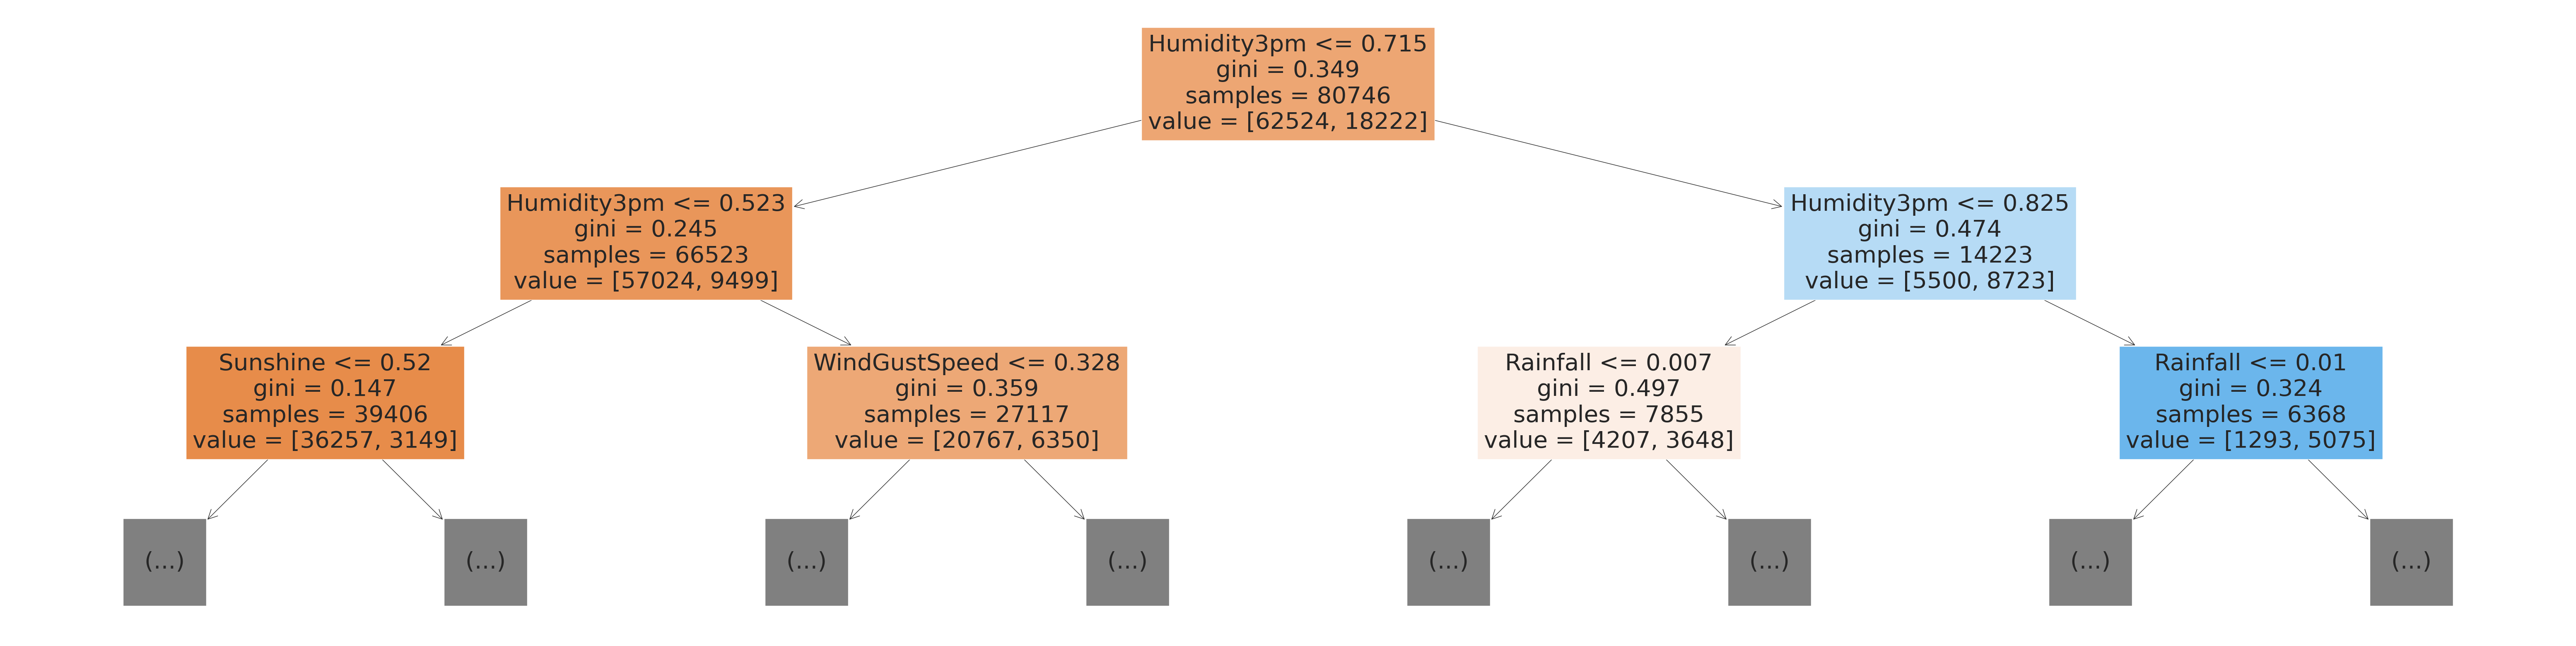

In [66]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names = X_train.columns, max_depth = 2, filled=True);  #Based on Gini Index we start calssifying the nodes whether it rainstomorrow or not as we have considered max_depth as 2 we calssify till the depth node or leaf node of the tree

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Let's check the depth of the tree that was created.

In [67]:
model.tree_.max_depth  #Max depth of the tree obtained is point of consideration to best classify the tree to reach the target this point comes when we talk about single node of the tree it does not provide sufficient accuracy as we need to classify till the depth node of the tree

47

We can also display the tree as text, which can be easier to follow for deeper trees.

In [68]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.52
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindSpeed9am <= 0.31
|   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.52
|   |   |   |   |   |   |   |   |   |   |--- Location_Nuriootpa <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- Location_Nuriootpa >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.52
|   |   |   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.12
|   |   |   |   |   |   |   |   |   |   |   |--- clas

> **EXERCISE**: Based on the above discussion, can you explain why the training accuracy is 100% whereas the validation accuracy is lower?

In [69]:
# as per the information the the model has completely trained wrt to training examples of other datasets or the model has memorized several training examples
acc = model.score(X_train, train_targets)
acc

0.9999752309711937

In [70]:
val_acc = model.score(X_val, val_targets)
val_acc

0.7580501558094673

In [ ]:
list_val = val_targets.value_counts()/len(val_targets)
list_val

No     0.790626
Yes    0.209374
Name: RainTomorrow, dtype: float64

In [72]:
list_val = val_targets.value_counts()/len(val_targets) > val_acc  # human_baseline method for prediction marginally greater than moddels's acc either no or yes
list_val

No      True
Yes    False
Name: RainTomorrow, dtype: bool

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [73]:
model.feature_importances_    # feature as importance are the key elements for decision tree compared to LinearRegression and LogisticRegression we use features and weights, we use importance and max_dept or max_leaf_nodes

array([0.03484547, 0.03022627, 0.04505888, 0.02386805, 0.04911642,
       0.05832793, 0.02655743, 0.03039204, 0.03591659, 0.2778627 ,
       0.03758919, 0.06597365, 0.01253384, 0.01731167, 0.03655624,
       0.0321955 , 0.00215018, 0.00088971, 0.00132083, 0.00176902,
       0.00118134, 0.00118526, 0.00146133, 0.00090797, 0.00143177,
       0.00105125, 0.00250258, 0.00148017, 0.0007755 , 0.00136447,
       0.0014986 , 0.00103219, 0.00098005, 0.00196964, 0.00159689,
       0.00033654, 0.00102524, 0.00109951, 0.00145312, 0.00212194,
       0.00105053, 0.00081294, 0.00088562, 0.00138072, 0.00111644,
       0.00189803, 0.0018863 , 0.00164439, 0.00039899, 0.00169416,
       0.00142469, 0.00132293, 0.00172544, 0.00393765, 0.00160437,
       0.00047298, 0.00206959, 0.00253562, 0.00163958, 0.0024157 ,
       0.00356881, 0.00240872, 0.0030351 , 0.00273171, 0.00288782,
       0.00255896, 0.00339653, 0.00279669, 0.00296533, 0.00224997,
       0.00290288, 0.00251286, 0.00157169, 0.00232473, 0.00173

Let's turn this into a dataframe and visualize the most important features.

In [74]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [75]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.277863
11    Pressure3pm    0.065974
5   WindGustSpeed    0.058328
4        Sunshine    0.049116
2        Rainfall    0.045059
10    Pressure9am    0.037589
14        Temp9am    0.036556
8     Humidity9am    0.035917
0         MinTemp    0.034845
15        Temp3pm    0.032196

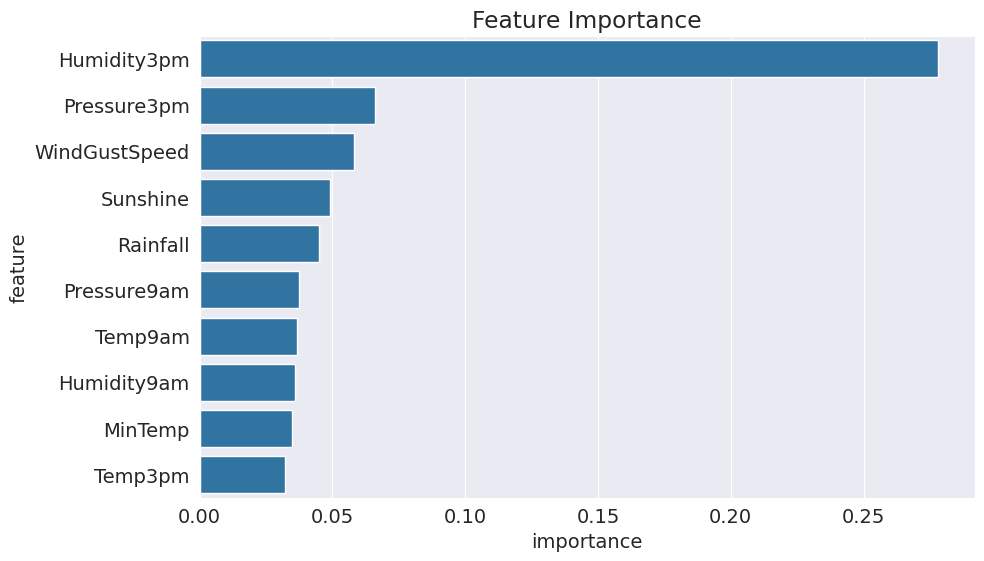

In [76]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');   #Feature importance wrt to several columns has its won empty values due to which we won't be getting the features that impact your targets, but on removing them you may get the more better relation of features

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [77]:
?DecisionTreeClassifier   #HyperParameter Tuning is taken in order to overcome your overfitting with new terms being read

Object `DecisionTreeClassifier   #HyperParameter Tuning is taken in order to overcome your overfitting with new terms being read` not found.


These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [78]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)   # consider max_depth and max_leaf_node of the tree as parameter that optimizes the tree

In [79]:
model.fit(X_train, train_targets)  # depth of tree is choosen with rand0_state as random_split in range of 42, we get generailzed treee

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [80]:
model.score(X_train, train_targets)   #we use accuracy_score of ML model especially for DTree we use score of scikit-learn that predicts and estimates


0.8292670844376192

In [81]:
model.score(X_val, val_targets)  # we observe the accuracy of val_set that has more acc than training set since we are generalizing more plus lesser depth also causes problem of classification that may not predict the target

0.8267547113815106

In [82]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8292670844376192, 0.8267547113815106)

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [83]:
model.classes_

array(['No', 'Yes'], dtype=object)

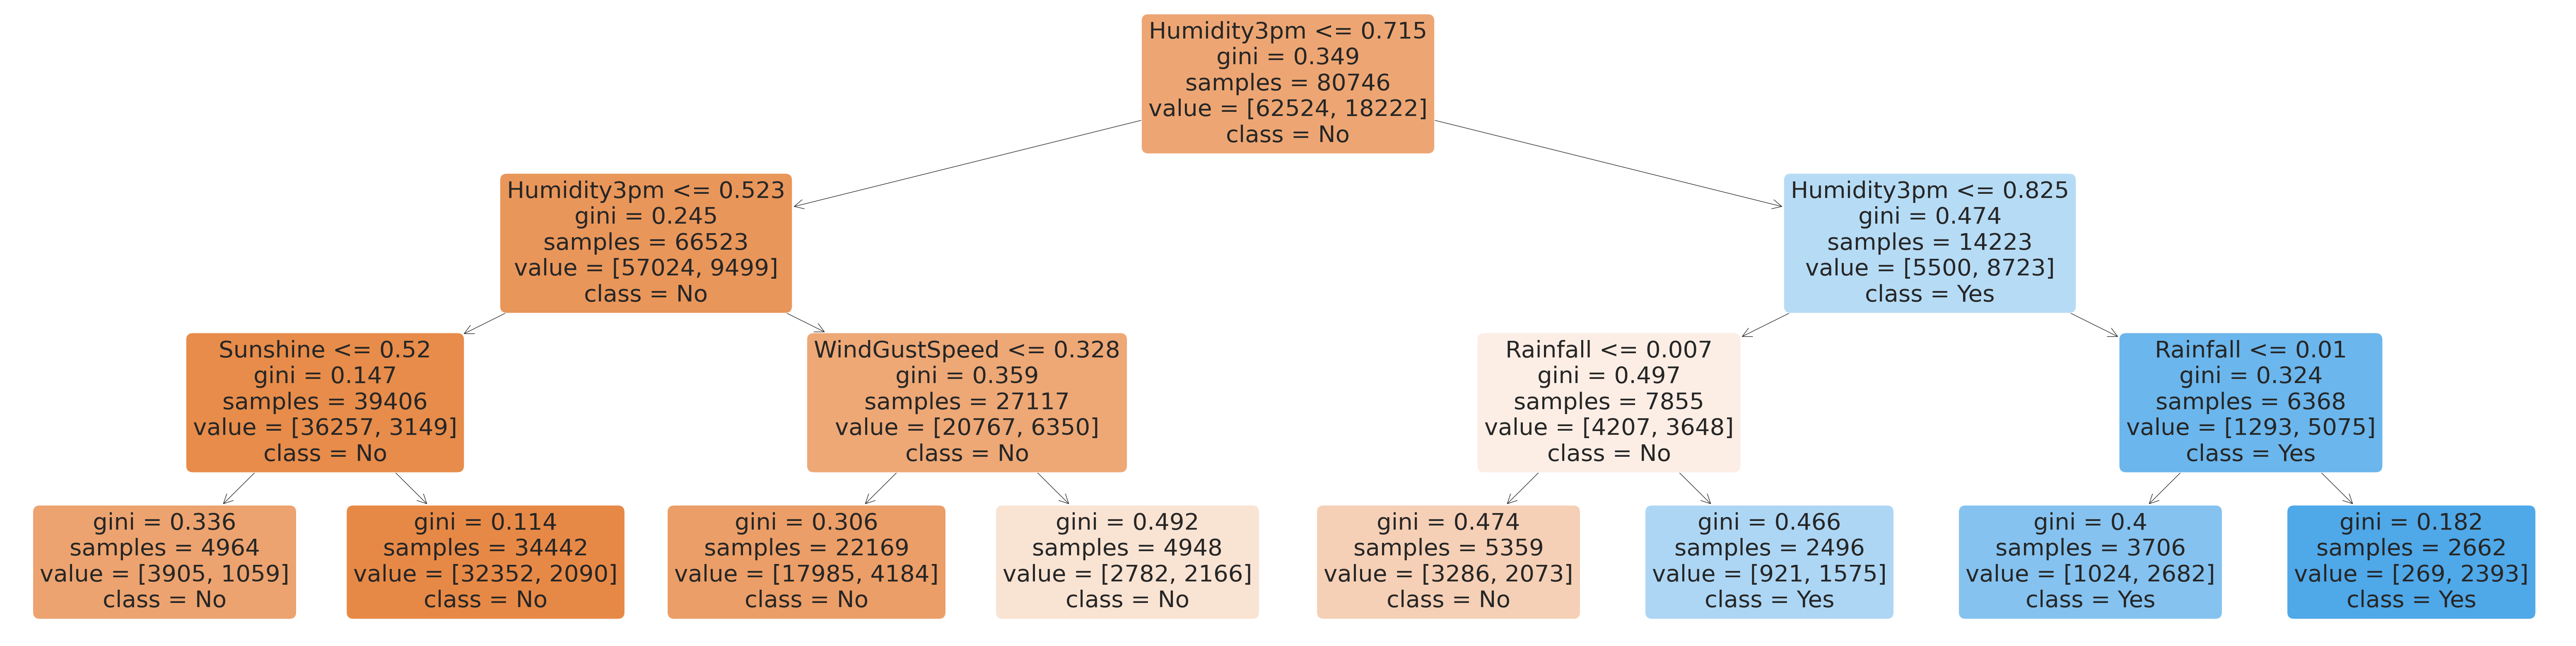

In [84]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);  #considering only first three levels we get the model more generalized

> **EXERCISE**: Study the decision tree diagram carefully and understand what each of the terms `gini`, `samples`, `value` and `class` mean.

In [85]:
tree_text = export_text(model, max_depth=3, feature_names=list(X_train.columns))  #textual representation provides the depth of how much the the model has trained the training examples and the unknown eamples as ur ur no of features are reduced only few example that predicts the o/p are selected
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.52
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.52
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Let's experiment with different depths using a helper function.

In [89]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df  # as u see on increasing the depth model val_error increasesand train_error decreases memorized

Max Depth  Training Error  Validation Error
0           1        0.181941          0.176488
1           2        0.176930          0.170695
2           3        0.168408          0.165194
3           4        0.162153          0.161624
4           5        0.157244          0.159752
5           6        0.153131          0.161098
6           7        0.149059          0.158055
7           8        0.144814          0.157411
8           9        0.139435          0.161800
9          10        0.131802          0.164375
10         11        0.122760          0.170402
11         12        0.113014          0.178185
12         13        0.102023          0.183802
13         14        0.090460          0.188250
14         15        0.079571          0.192404
15         16        0.068253          0.200538
16         17        0.057681          0.200889
17         18        0.048812          0.201124
18         19        0.040587          0.206215
19         20        0.033810          0.208672
20         21        0.028014          0.208965
21         22        0.022931          0.218094
22         23        0.018798          0.222424

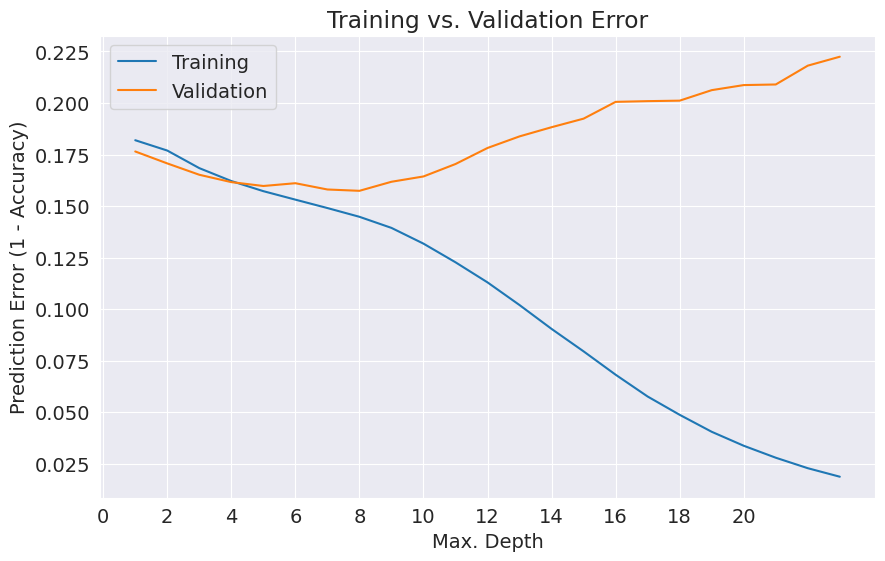

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">





You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [91]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8351387446208637

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [92]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42) # 128 we have the secon HyperParameter leaf nodes as it is independent of layers of tree we have 128 nodes = 2^7 7 layers .

In [93]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [94]:
model.score(X_train, train_targets)

0.8509152156143958

In [95]:
model.score(X_val, val_targets)  #val_acc score is pretty closer to train_acc

0.8353613295741208

In [96]:
model.tree_.max_depth   #max tree depth for 64 leaf nodes and tree dept for 128 leaf nodes

12

In [ ]:
model_text = export_text(model, feature_names=list(X_train.columns))   #textual representation of DTree the optimized Dtree wrt to leaf node of the tree
print(model_text[:10000])   #only countable no of columns will be predicted and choosen as we have reduced the depth and leaf nodes with better accuracy

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

> **EXERCISE**: Find the combination of `max_depth` and `max_leaf_nodes` that results in the highest validation accuracy.

In [97]:
model = DecisionTreeClassifier

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=190, random_state=42)

In [ ]:
train_acc = model.score(X_train, train_targets)
train_acc

0.837847491529575

In [ ]:
val_acc = model.score(X_val, val_targets)
val_acc

0.8383755632278074